In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display

sns.set_theme(color_codes=True)

df = pd.read_csv('data/Final_House_Data.csv')
df.head()

,Unnamed: 0,bathrooms,bedrooms,floors,grade,price,sqft_above,sqft_basement,sqft_lot
0,0,1.0,3.0,1.0,7.0,221900.0,1180.0,0.0,5650.0
1,2,1.0,2.0,1.0,6.0,180000.0,770.0,0.0,10000.0
2,3,3.0,4.0,1.0,7.0,604000.0,1050.0,910.0,5000.0
3,4,2.0,3.0,1.0,8.0,510000.0,1680.0,0.0,8080.0
4,5,4.5,4.0,1.0,11.0,1230000.0,3890.0,1530.0,101930.0


In [2]:
df = df.drop('Unnamed: 0', axis = 1)

In [3]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.33, random_state=42)

In [4]:
train

,bathrooms,bedrooms,floors,grade,price,sqft_above,sqft_basement,sqft_lot
11761,2.50,4.0,2.0,7.0,530000.0,3020.0,0.0,6788.0
11491,2.50,3.0,2.0,7.0,571000.0,2510.0,0.0,5186.0
5922,1.00,2.0,1.5,8.0,575000.0,1310.0,200.0,4032.0
12217,1.00,4.0,1.5,7.0,500000.0,1440.0,0.0,7100.0
7765,1.75,2.0,1.5,8.0,825000.0,2050.0,0.0,4000.0
...,...,...,...,...,...,...,...,...
11284,3.25,5.0,2.0,9.0,995000.0,2970.0,1000.0,8029.0
11964,4.25,5.0,2.0,11.0,1170000.0,4610.0,0.0,13252.0
5390,2.00,3.0,1.0,7.0,510000.0,1420.0,0.0,11325.0
860,1.00,2.0,1.0,6.0,340000.0,1090.0,0.0,6771.0


In [5]:
test

,bathrooms,bedrooms,floors,grade,price,sqft_above,sqft_basement,sqft_lot
11275,2.50,3.0,2.0,7.0,319950.0,1700.0,0.0,7000.0
20500,3.50,4.0,2.0,8.0,495000.0,2530.0,640.0,3858.0
13696,1.50,2.0,2.0,7.0,310000.0,1010.0,0.0,10005.0
1475,2.50,5.0,1.0,8.0,555000.0,1420.0,670.0,8712.0
6355,3.25,4.0,1.0,10.0,545000.0,2356.0,2030.0,12275.0
...,...,...,...,...,...,...,...,...
14,3.00,4.0,2.0,9.0,650000.0,1980.0,970.0,5000.0
5652,2.50,4.0,1.0,8.0,513000.0,1880.0,780.0,8887.0
4778,1.00,4.0,1.5,7.0,599000.0,1590.0,0.0,4280.0
2792,2.25,3.0,1.0,8.0,476000.0,1170.0,400.0,7187.0


> Not sure how this happened but you might want to look at this

In [6]:
test[test['bathrooms'].isna()]

,bathrooms,bedrooms,floors,grade,price,sqft_above,sqft_basement,sqft_lot
15277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
test = test.fillna(test.mode().iloc[0])

In [8]:
test[test['bathrooms'].isna()]

,bathrooms,bedrooms,floors,grade,price,sqft_above,sqft_basement,sqft_lot


> cleaned data here

In [9]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
X_train = train.drop('price', axis=1)
y_train = train['price']

linreg.fit(X_train, y_train)

LinearRegression()

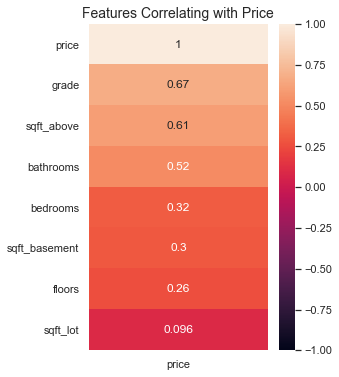

In [10]:
display.Image('Images/Price_corr.png')

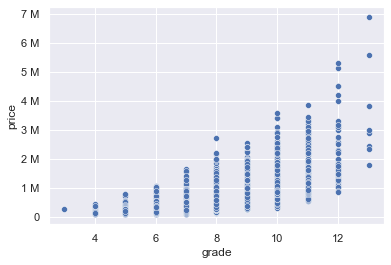

In [11]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots()

sns.scatterplot(x = train['grade'], y = train['price'])
ax.yaxis.set_major_formatter(ticker.EngFormatter());

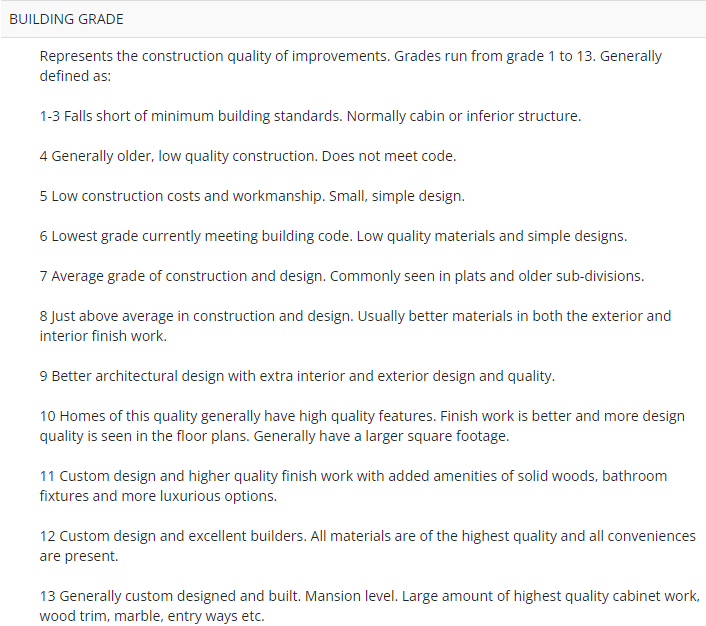

In [12]:
display.Image('Images/kc_building_grades.png')

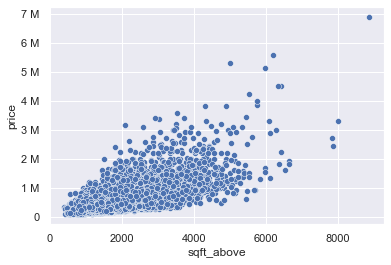

In [13]:
fig, ax = plt.subplots()

sns.scatterplot(x = train['sqft_above'], y = train['price'])
ax.yaxis.set_major_formatter(ticker.EngFormatter());

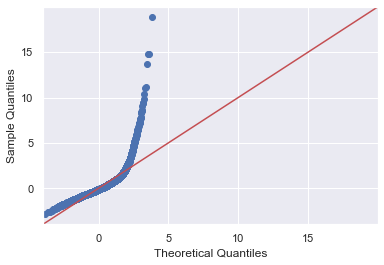

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

def model_qq(formula):
    model = ols(formula, train).fit()
    residuals = model.resid
    return sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

formula = 'price ~ grade + sqft_above'
model_qq(formula);

As shown by the model summary and the qq-plot, the Skew and Kurtosis are quite high.
Before transofrming the data, for the next iteration the rest of the features will be added.

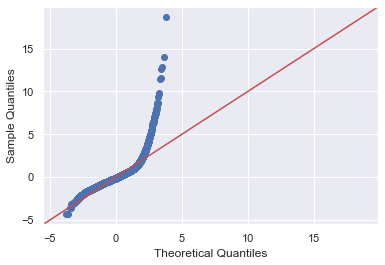

In [15]:
formula = 'price ~ grade + sqft_above + bathrooms + bedrooms + sqft_basement + floors + sqft_lot'
model_qq(formula);

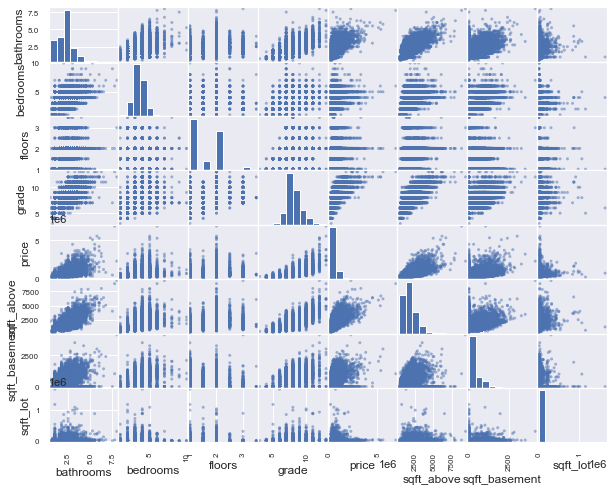

In [16]:
pd.plotting.scatter_matrix(df, figsize=(10, 8));

It is evident that several of the above columns are categorical, inlcuding 'bedrooms', 'floors', and 'grade'.  
The data will not be transformed via dummy variables, as all of these columns contain ordinal categorical data, meaning they can still be used as linear regression. However, old modelling can be told in the formula which columns are categorical by surrounding the column names with 'C()'.  
Let's see how that infers with out R-squared and R-adjusted values.

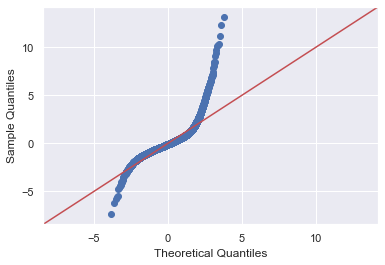

In [17]:
formula = 'price ~ C(grade) + sqft_above + bathrooms + C(bedrooms) + sqft_basement + C(floors) + sqft_lot'
model_qq(formula);

Great, the R-squared value has made another leap to 0.61, and it is worth noting as well that ad the grade level increases it's coefficient and t value increase as well.   
For Iteration 4, the distributions of the data will be looked at to potentially deal with the high Skew and Kurtosis values the model is showing.

> I added these cells to see pre-transform metrics

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
import math

X_test = test.drop('price', axis=1)
y_test = test['price']

In [19]:
linreg.fit(X_train, y_train)

LinearRegression()

In [20]:
y_train_preds = linreg.predict(X_train)
y_test_preds = linreg.predict(X_test)

In [21]:
print(f'Train MSE: {mean_squared_error(y_train, y_train_preds)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_preds)}')
print(f'Train R2: {r2_score(y_train, y_train_preds)}')
print(f'Test R2: {r2_score(y_test, y_test_preds)}')

Train MSE: 56284541828.32895
Test MSE: 55162805282.6315
Train R2: 0.5518301817208815
Test R2: 0.5411217111310509


> Up to here

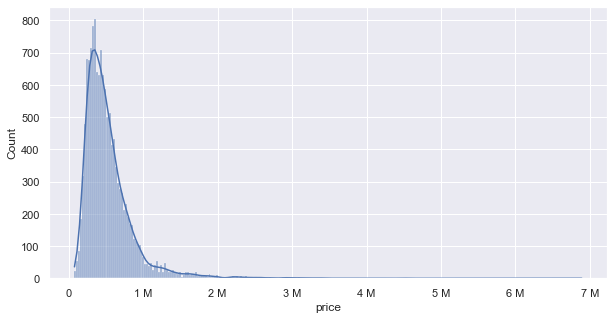

In [22]:
fig, ax = plt.subplots(figsize=(10,5))

sns.histplot(train['price'], kde=True)
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

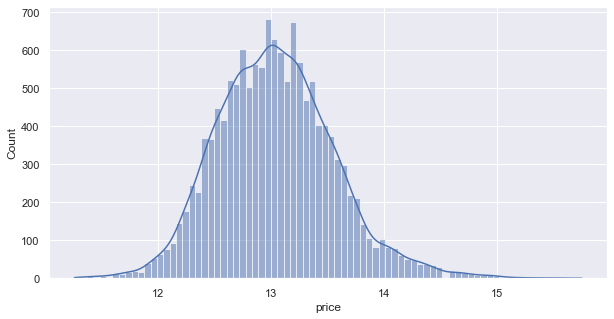

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(np.log(train['price']), kde=True);

In [24]:
test

,bathrooms,bedrooms,floors,grade,price,sqft_above,sqft_basement,sqft_lot
11275,2.50,3.0,2.0,7.0,319950.0,1700.0,0.0,7000.0
20500,3.50,4.0,2.0,8.0,495000.0,2530.0,640.0,3858.0
13696,1.50,2.0,2.0,7.0,310000.0,1010.0,0.0,10005.0
1475,2.50,5.0,1.0,8.0,555000.0,1420.0,670.0,8712.0
6355,3.25,4.0,1.0,10.0,545000.0,2356.0,2030.0,12275.0
...,...,...,...,...,...,...,...,...
14,3.00,4.0,2.0,9.0,650000.0,1980.0,970.0,5000.0
5652,2.50,4.0,1.0,8.0,513000.0,1880.0,780.0,8887.0
4778,1.00,4.0,1.5,7.0,599000.0,1590.0,0.0,4280.0
2792,2.25,3.0,1.0,8.0,476000.0,1170.0,400.0,7187.0


In [25]:
# Spotted a couple of bugs here in this function. 

def transform(log_cols, data):
    for cols in log_cols:
        if (data[cols] == 0).any():
            print(cols, 'has been log 1p transformed')
#             data[cols] = np.log1p(train[cols])
            data[cols] = np.log1p(data[cols])
        else:
            print(cols, 'has been log transformed')
#             data[cols] = np.log(train[cols])
            data[cols] = np.log(data[cols])
    # Needs to return a value - added this return 
    return data

> I really like how you've output logs to see which columns have been log / log1p transformed. 
>
> Just watch out for different functions being applied to train/test sets, in case one of them have zeroes and the other ones not. 
> For that reason I would just apply log1p to everything.

In [26]:
log_cols = ['price', 'sqft_above', 'sqft_basement', 'sqft_lot']
train = transform(log_cols, train)

price has been log transformed
sqft_above has been log transformed
sqft_basement has been log 1p transformed
sqft_lot has been log transformed


In [27]:
train.head()

,bathrooms,bedrooms,floors,grade,price,sqft_above,sqft_basement,sqft_lot
11761,2.50,4.0,2.0,7.0,13.180632,8.013012,0.000000,8.822912
11491,2.50,3.0,2.0,7.0,13.255144,7.828038,0.000000,8.553718
5922,1.00,2.0,1.5,8.0,13.262125,7.177782,5.303305,8.302018
12217,1.00,4.0,1.5,7.0,13.122363,7.272398,0.000000,8.867850
7765,1.75,2.0,1.5,8.0,13.623139,7.625595,0.000000,8.294050


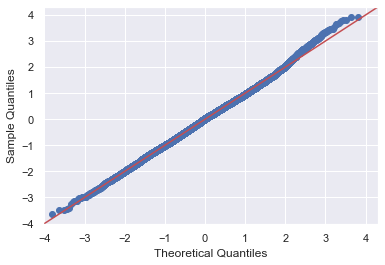

In [28]:
model_qq(formula);

In [29]:
test = transform(log_cols, test)

price has been log transformed
sqft_above has been log transformed
sqft_basement has been log 1p transformed
sqft_lot has been log transformed


In [30]:
test.head()

,bathrooms,bedrooms,floors,grade,price,sqft_above,sqft_basement,sqft_lot
11275,2.50,3.0,2.0,7.0,12.675920,7.438384,0.000000,8.853665
20500,3.50,4.0,2.0,8.0,13.112313,7.835975,6.463029,8.257904
13696,1.50,2.0,2.0,7.0,12.644328,6.917706,0.000000,9.210840
1475,2.50,5.0,1.0,8.0,13.226723,7.258412,6.508769,9.072457
6355,3.25,4.0,1.0,10.0,13.208541,7.764721,7.616284,9.415320


In [31]:
X_train = train.drop('price', axis=1)
y_train = train['price']

X_test = test.drop('price', axis=1)
y_test = test['price']

In [32]:
linreg.fit(X_train, y_train)
y_train_preds = linreg.predict(X_train)
y_test_preds = linreg.predict(X_test)
print(f'Train MSE: {mean_squared_error(y_train, y_train_preds)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_preds)}')
print(f'Train R2: {r2_score(y_train, y_train_preds)}')
print(f'Test R2: {r2_score(y_test, y_test_preds)}')

Train MSE: 0.11817756540435188
Test MSE: 0.12274024809816293
Train R2: 0.5637907681812204
Test R2: 0.5428606004138102


<AxesSubplot:xlabel='price'>

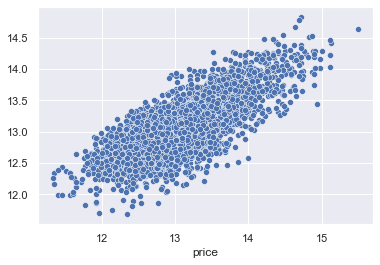

In [33]:
sns.scatterplot(x=y_test, y=y_test_preds)

In [34]:
from sklearn.feature_selection import RFE

selector = RFE(linreg, n_features_to_select=3)
selector = selector.fit(X_train, y_train.values)

selector.support_

array([False, False, False,  True,  True,  True, False])

In [35]:
selected_columns = X_train.columns[selector.support_]
linreg.fit(X_train[selected_columns], y_train)
print(selected_columns)

Index(['grade', 'sqft_above', 'sqft_basement'], dtype='object')


In [36]:
import statsmodels.api as sm

fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model, 'sqft_above', fig=fig);

NameError: name 'model' is not defined

<Figure size 720x432 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x = train['grade'],y = train['price']);

In [ ]:
sns.jointplot(x = train['sqft_above'], y = train['price'], kind='reg', height=10);

In [ ]:
from sklearn.linear_model import LinearRegression
train['sqft_above'] = np.exp(train['sqft_above'])

features = ['sqft_above', 'grade']
x = train[features]
y = np.exp(train['price'])

In [ ]:
linreg.fit(x, y)

linreg.score(x, y)

~~Approximately for every 1 grade level attained, the house price will increase by \\$ []  
Approximately for every 1 sqft of living space added, the house price will increase by \\$ []~~